  **AUTO MPG MACHINE LEARNING PROJECT**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
auto = pd.read_csv('/content/auto mpg_csv.zip')

In [ ]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [ ]:
auto.size

3582

In [ ]:
auto.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [ ]:
auto.dropna(inplace=True)

In [ ]:
missing_values = auto.isnull().sum()
print(missing_values)


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


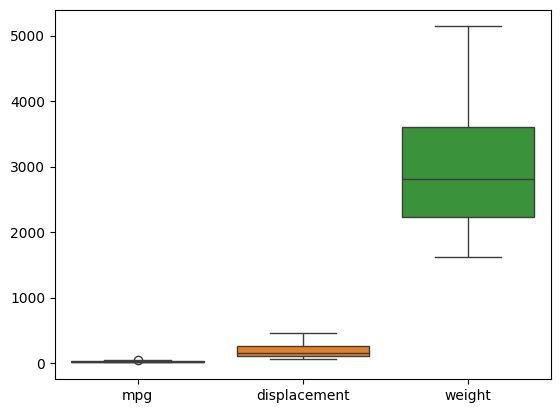

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=auto[['mpg', 'displacement', 'horsepower', 'weight']])
plt.show()

In [ ]:
threshold = 100  # Example threshold
auto = auto[auto['mpg'] < threshold]  # Adjust threshold as needed


In [ ]:
auto['mpg'] = auto['mpg'].clip(lower=10, upper=40)  # Example bounds


In [ ]:
print(auto.dtypes)

auto['cylinders'] = auto['cylinders'].astype(int)


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


In [ ]:
print(auto.duplicated().sum())

auto.drop_duplicates(inplace=True)


0


In [ ]:
# Check for non-numeric values in the relevant columns
for column in ['mpg', 'displacement', 'horsepower', 'weight']:
    print(auto[column].apply(pd.to_numeric, errors='coerce').isna().sum())


0
0
6
0


In [ ]:
auto['mpg'] = pd.to_numeric(auto['mpg'], errors='coerce')
auto['displacement'] = pd.to_numeric(auto['displacement'], errors='coerce')
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto['weight'] = pd.to_numeric(auto['weight'], errors='coerce')


In [ ]:
auto[['mpg', 'displacement', 'horsepower', 'weight']].isnull().sum()


,0
mpg,0
displacement,0
horsepower,6
weight,0


In [ ]:
auto.dropna(subset=['mpg', 'displacement', 'horsepower', 'weight'], inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
auto[['mpg', 'displacement', 'horsepower', 'weight']] = scaler.fit_transform(auto[['mpg', 'displacement', 'horsepower', 'weight']])


In [ ]:
print(auto[['mpg', 'displacement', 'horsepower', 'weight']].head())


        mpg  displacement  horsepower    weight
0 -0.706049      1.077290    0.664133  0.620540
1 -1.100029      1.488732    1.574594  0.843334
2 -0.706049      1.182542    1.184397  0.540382
3 -0.968702      1.048584    1.184397  0.536845
4 -0.837375      1.029447    0.924265  0.555706


In [ ]:
auto['origin'] = auto['origin'].astype('category').cat.codes


In [ ]:
auto['power_to_weight'] = auto['horsepower'] / auto['weight']


In [ ]:
auto['car name'] = auto['car name'].str.lower()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
auto[['mpg', 'displacement', 'horsepower', 'weight']] = scaler.fit_transform(auto[['mpg', 'displacement', 'horsepower', 'weight']])


**Exploratory Data Analysis (EDA) and visualization are crucial for understanding your dataset and gaining insights. Here’s a structured approach to EDA and visualization for your car dataset:**



In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mpg              392 non-null    float64
 1   cylinders        392 non-null    int64  
 2   displacement     392 non-null    float64
 3   horsepower       392 non-null    float64
 4   weight           392 non-null    float64
 5   acceleration     392 non-null    float64
 6   model year       392 non-null    int64  
 7   origin           392 non-null    int8   
 8   car name         392 non-null    object 
 9   power_to_weight  392 non-null    float64
dtypes: float64(6), int64(2), int8(1), object(1)
memory usage: 31.0+ KB


In [ ]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,power_to_weight
0,-0.706049,8,1.077290,0.664133,0.620540,12.0,70,0,chevrolet chevelle malibu,1.070249
1,-1.100029,8,1.488732,1.574594,0.843334,11.5,70,0,buick skylark 320,1.867107
2,-0.706049,8,1.182542,1.184397,0.540382,11.0,70,0,plymouth satellite,2.191777
3,-0.968702,8,1.048584,1.184397,0.536845,12.0,70,0,amc rebel sst,2.206216
4,-0.837375,8,1.029447,0.924265,0.555706,10.5,70,0,ford torino,1.663225


In [ ]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,power_to_weight
count,392.000000,392.000000,392.000000,3.920000e+02,3.920000e+02,392.000000,392.000000,392.000000,392.000000
mean,0.000000,5.471939,0.000000,1.812609e-17,-1.812609e-17,15.541327,75.979592,0.576531,-0.119168
std,1.001278,1.705783,1.001278,1.001278e+00,1.001278e+00,2.758864,3.683737,0.805518,14.348689
min,-1.756663,3.000000,-1.209563,-1.520975e+00,-1.608575e+00,8.000000,70.000000,0.000000,-272.284761
25%,-0.837375,4.000000,-0.855532,-7.665929e-01,-8.868535e-01,13.775000,73.000000,0.000000,0.346353
50%,-0.082247,4.000000,-0.415384,-2.853488e-01,-2.052109e-01,15.500000,76.000000,0.000000,0.781571
75%,0.738545,8.000000,0.778276,5.600800e-01,7.510927e-01,17.025000,79.000000,1.000000,1.066166
max,2.183140,8.000000,2.493416,3.265452e+00,2.549061e+00,24.800000,82.000000,2.000000,34.141281


**Distribution Analysis**

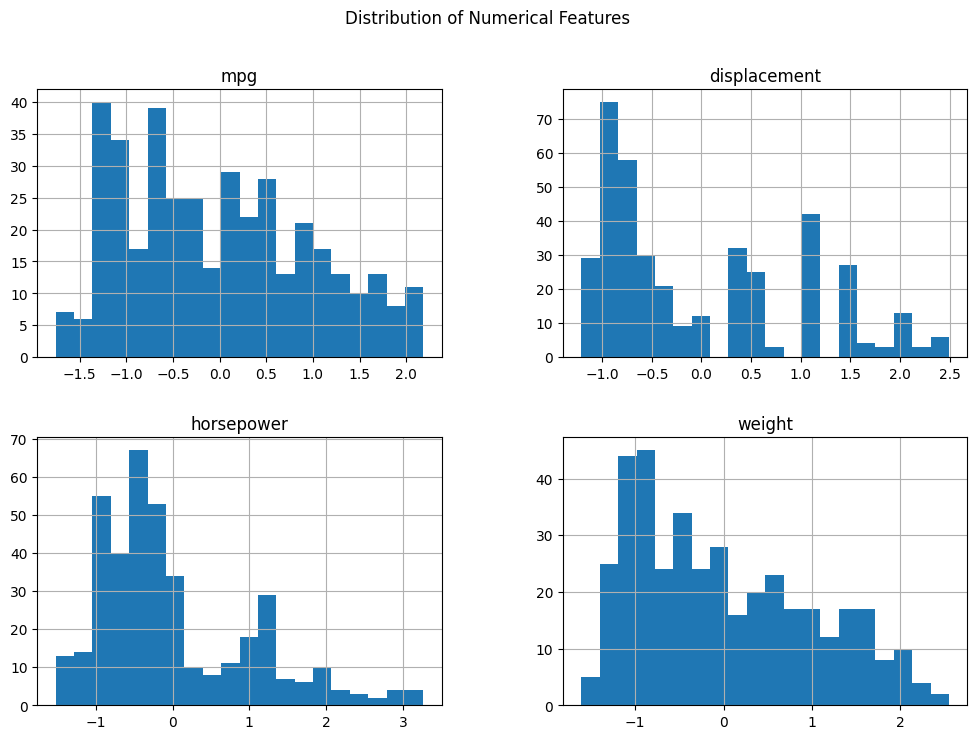

In [ ]:
import matplotlib.pyplot as plt

auto[['mpg', 'displacement', 'horsepower', 'weight']].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()


**Density Plots**

<ipython-input-44-c93ebf6770a2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(auto['mpg'], shade=True, label='MPG')
<ipython-input-44-c93ebf6770a2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(auto['displacement'], shade=True, label='Displacement')
<ipython-input-44-c93ebf6770a2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(auto['horsepower'], shade=True, label='Horsepower')
<ipython-input-44-c93ebf6770a2>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(auto['weight'], shade=True, label=

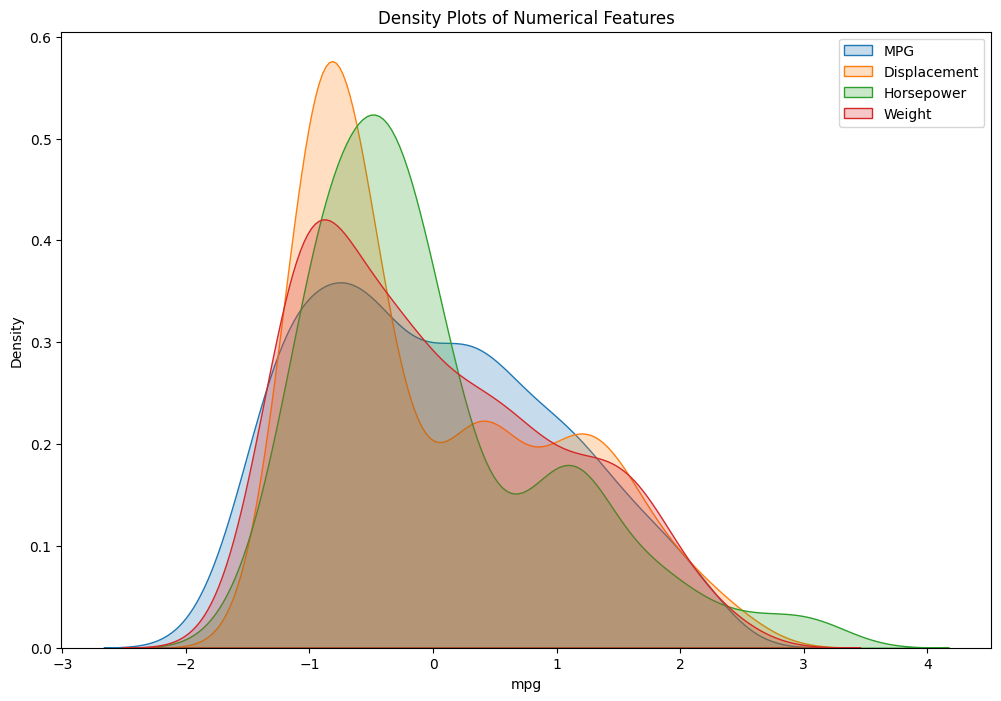

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.kdeplot(auto['mpg'], shade=True, label='MPG')
sns.kdeplot(auto['displacement'], shade=True, label='Displacement')
sns.kdeplot(auto['horsepower'], shade=True, label='Horsepower')
sns.kdeplot(auto['weight'], shade=True, label='Weight')
plt.title('Density Plots of Numerical Features')
plt.legend()
plt.show()


Pairwise Relationship

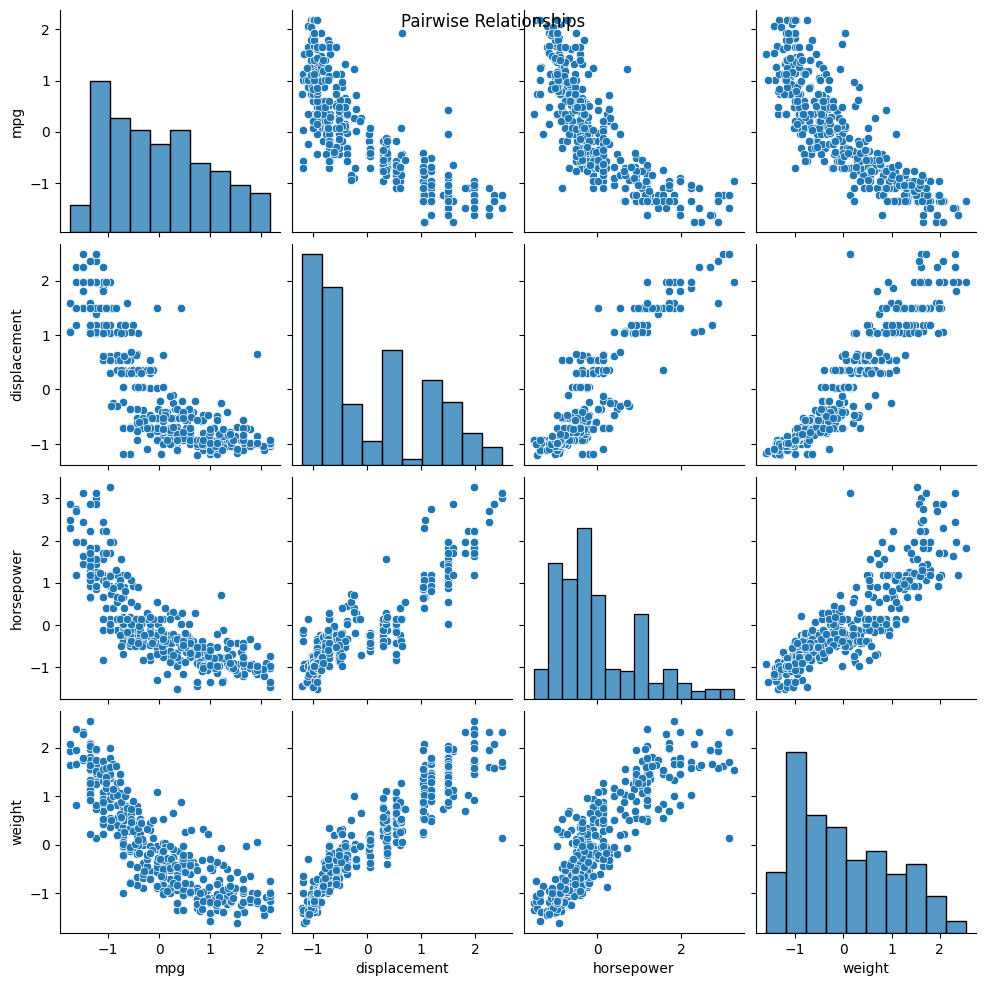

In [ ]:
sns.pairplot(auto[['mpg', 'displacement', 'horsepower', 'weight']])
plt.suptitle('Pairwise Relationships')
plt.show()


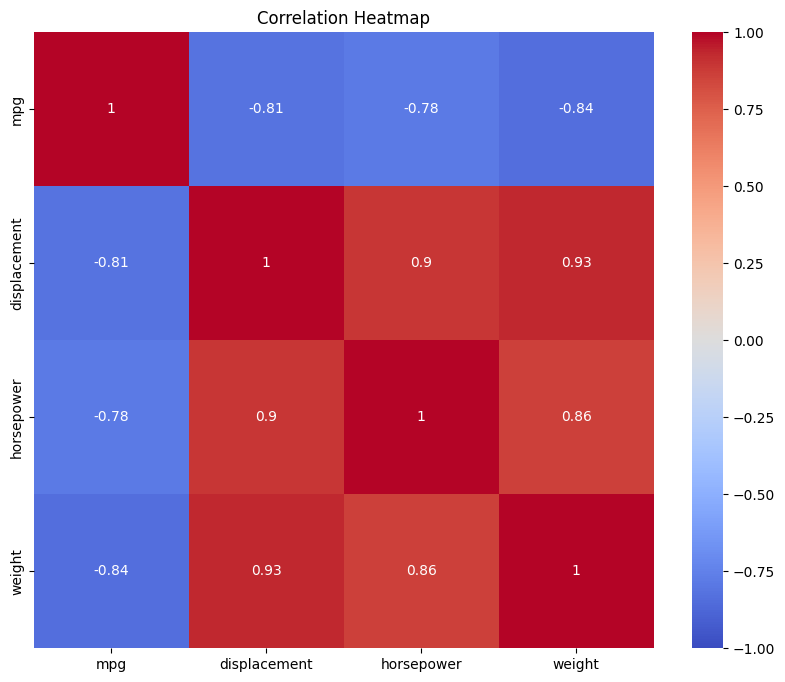

In [ ]:
plt.figure(figsize=(10, 8))
corr = auto[['mpg', 'displacement', 'horsepower', 'weight']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


 Categorical Data Analysis


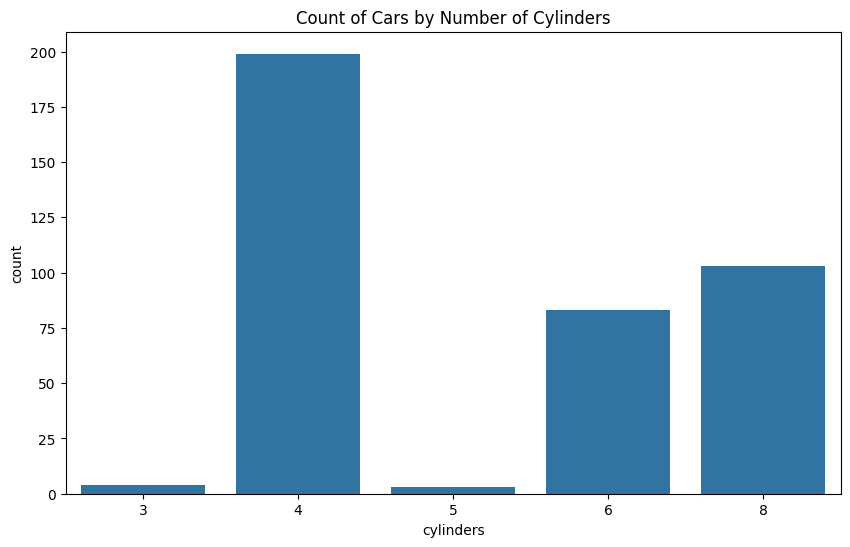

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cylinders', data=auto)
plt.title('Count of Cars by Number of Cylinders')
plt.show()


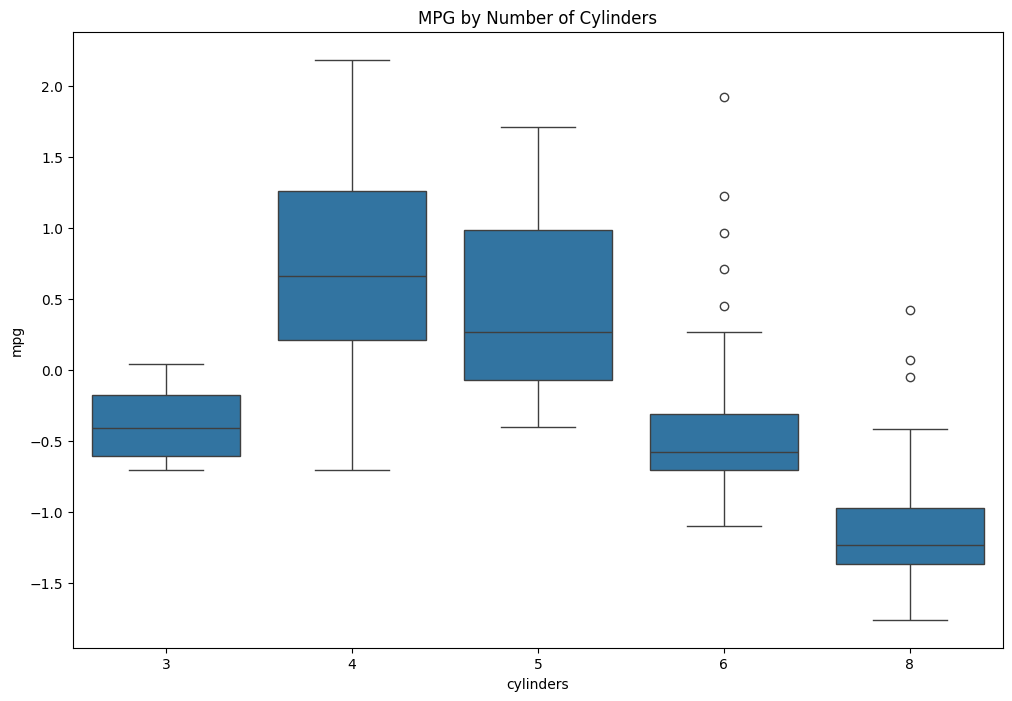

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='cylinders', y='mpg', data=auto)
plt.title('MPG by Number of Cylinders')
plt.show()


Time Series or Trend Analysis


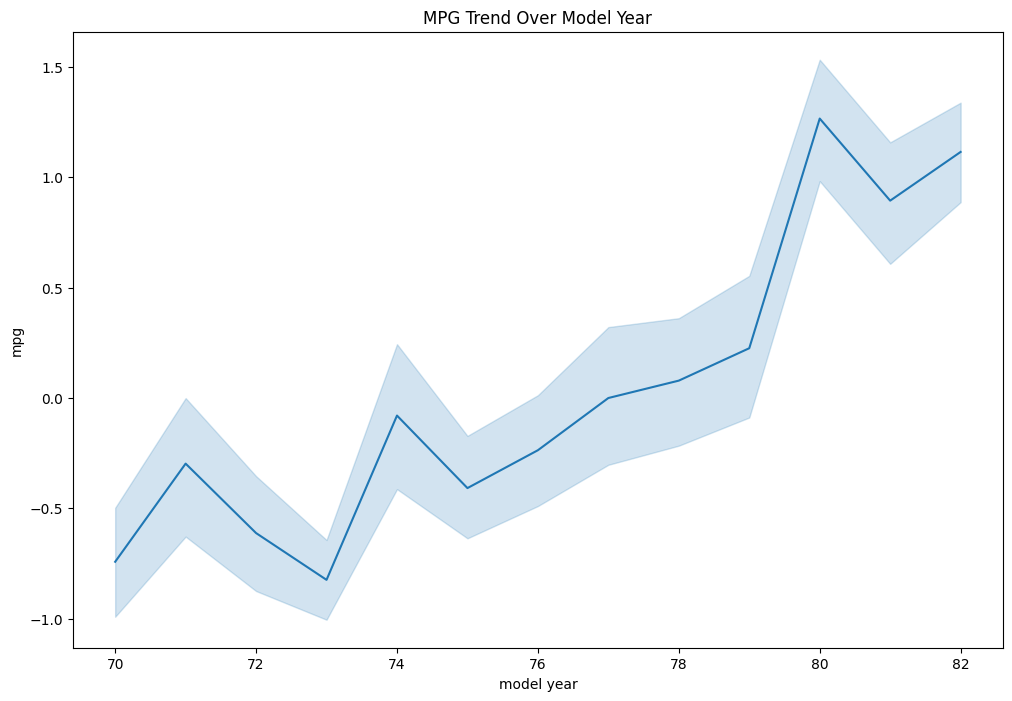

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='model year', y='mpg', data=auto)
plt.title('MPG Trend Over Model Year')
plt.show()


Custom Visualizations


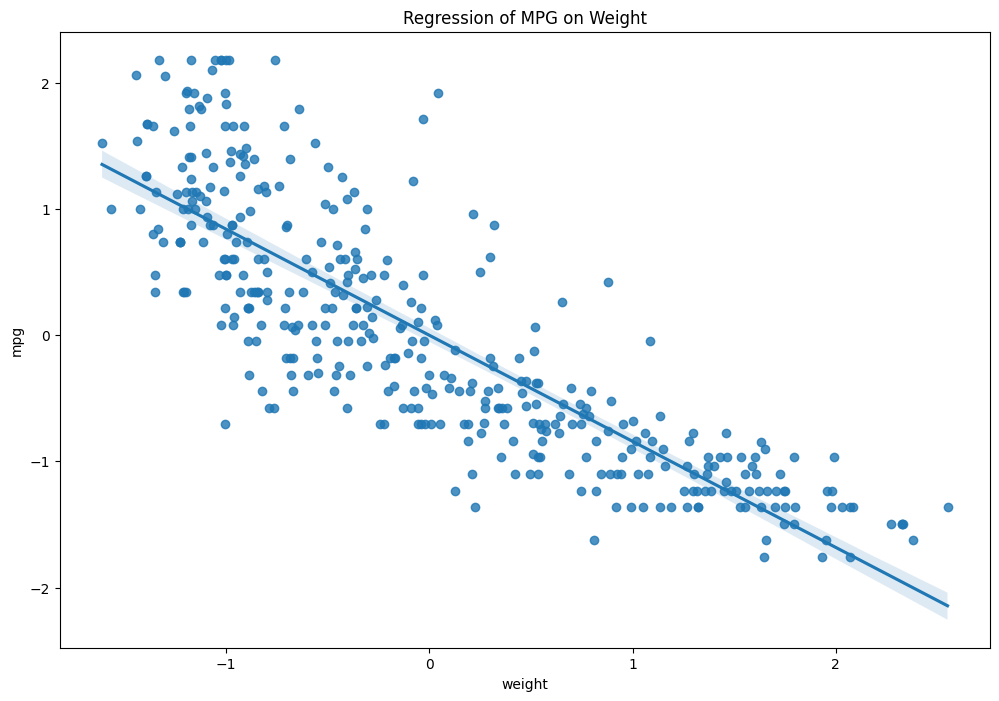

In [ ]:
plt.figure(figsize=(12, 8))
sns.regplot(x='weight', y='mpg', data=auto)
plt.title('Regression of MPG on Weight')
plt.show()


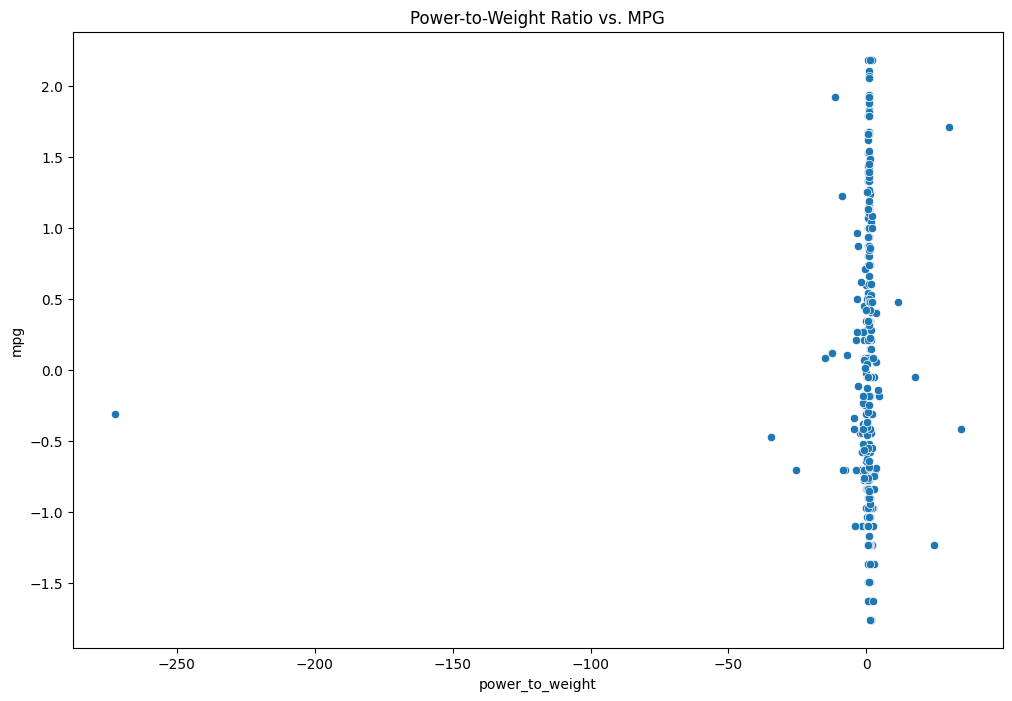

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='power_to_weight', y='mpg', data=auto)
plt.title('Power-to-Weight Ratio vs. MPG')
plt.show()


Advanced Visualizations


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = {
    'mpg': [18.0, 15.0, 18.0, 16.0, 17.0],
    'displacement': [307.0, 350.0, 318.0, 304.0, 302.0],
    'horsepower': [130, 165, 150, 150, 140],
    'weight': [3504, 3693, 3436, 3433, 3449],
    'cylinders': [8, 8, 8, 8, 8]
}

In [ ]:
auto = pd.DataFrame(data)

In [ ]:
auto['cylinders'] = auto['cylinders'].astype('category')

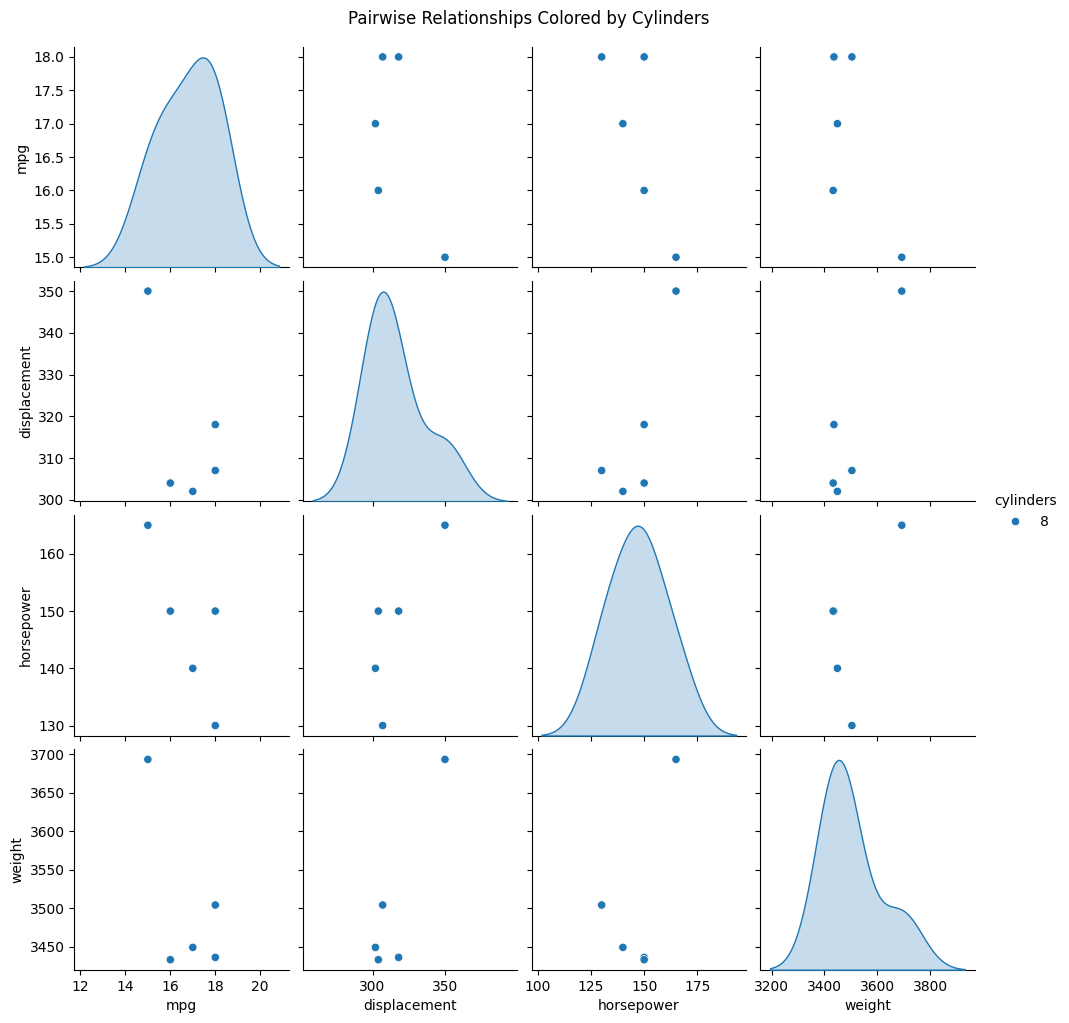

In [ ]:
sns.pairplot(auto[['mpg', 'displacement', 'horsepower', 'weight', 'cylinders']], hue='cylinders')
plt.suptitle('Pairwise Relationships Colored by Cylinders', y=1.02)
plt.show()


 **Creating New Features**

 Power-to-Weight Ratio


In [ ]:
auto.dtypes

,0
mpg,float64
displacement,float64
horsepower,int64
weight,int64
cylinders,category


In [ ]:
auto['power_to_weight'] = auto['horsepower'] / auto['weight']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [ ]:
auto['cylinders'] = le.fit_transform(auto['cylinders'])

In [ ]:
import pandas as pd
import numpy as np

# Sample data for demonstration
data = {
    'displacement': [307.0, 350.0, 318.0, 304.0, 302.0],
    'cylinders': ['8', '8', '8', '8', '8']  # Categorical in string format
}
auto = pd.DataFrame(data)

# Convert 'cylinders' to numeric
auto['cylinders'] = pd.to_numeric(auto['cylinders'], errors='coerce')

# Handle missing values if any
auto['cylinders'].fillna(auto['cylinders'].median(), inplace=True)

# Perform the division
auto['engine_size_per_cylinder'] = auto['displacement'] / auto['cylinders']

print(auto)


   displacement  cylinders  engine_size_per_cylinder
0         307.0          8                    38.375
1         350.0          8                    43.750
2         318.0          8                    39.750
3         304.0          8                    38.000
4         302.0          8                    37.750


**Linear regression**
        Linear regression is a foundational algorithm in machine learning and statistics used to model the relationship between a dependent variable (target) and one or more independent variables (features). It’s widely used for both predictive modeling and inferential statistics.

Here’s a step-by-step guide to implementing linear regression using Python, particularly with scikit-learn, a popular machine learning library.     

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = {
    'displacement': [307.0, 350.0, 318.0, 304.0, 302.0],
    'horsepower': [130, 165, 150, 150, 140],
    'weight': [3504, 3693, 3436, 3433, 3449],
    'mpg': [18.0, 15.0, 18.0, 16.0, 17.0]
}


In [ ]:
auto=pd.DataFrame(data)


In [ ]:
X=auto[['displacement','horsepower','weight']]
y=auto['mpg']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
model = LinearRegression()


In [ ]:
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 8.0886286328719
R-squared: nan


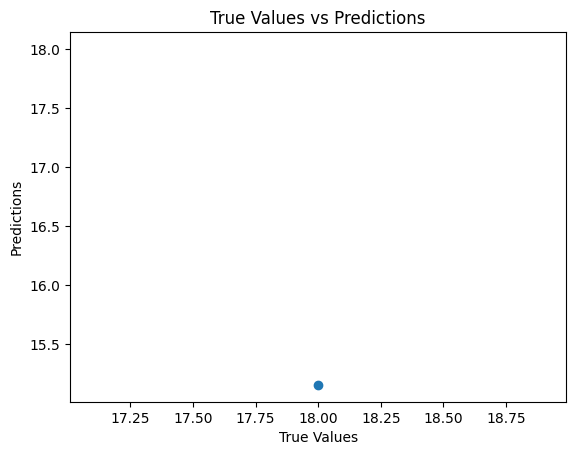

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.show()


Logistic regression


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Accuracy: 0.0
Confusion Matrix:
[[0 0]
 [1 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



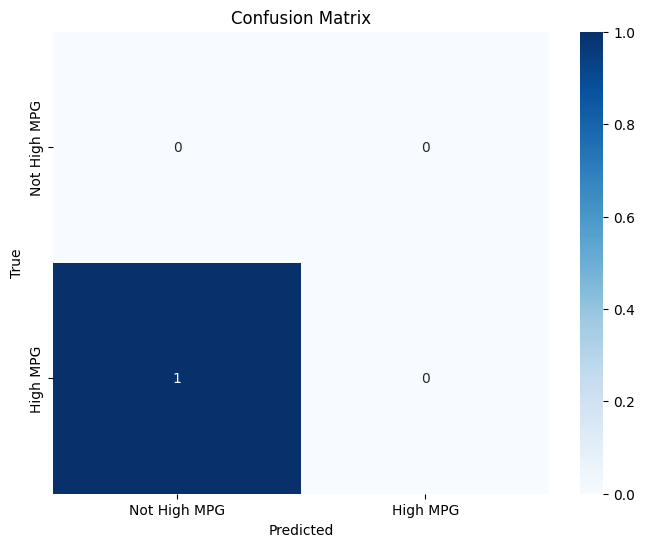

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'displacement': [307.0, 350.0, 318.0, 304.0, 302.0],
    'horsepower': [130, 165, 150, 150, 140],
    'weight': [3504, 3693, 3436, 3433, 3449],
    'mpg': [18.0, 15.0, 18.0, 16.0, 17.0],
    'high_mpg': [1, 0, 1, 0, 0]  # Binary target variable
}
df = pd.DataFrame(data)

# Define features and target
X = df[['displacement', 'horsepower', 'weight']]
y = df['high_mpg']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not High MPG', 'High MPG'],
            yticklabels=['Not High MPG', 'High MPG'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# Sigmoid Function for Logistic Regression:


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
data = {
    'displacement': [307.0, 350.0, 318.0, 304.0, 302.0],
    'horsepower': [130, 165, 150, 150, 140],
    'weight': [3504, 3693, 3436, 3433, 3449],
    'mpg': [18.0, 15.0, 18.0, 16.0, 17.0],
    'high_mpg': [1, 0, 1, 0, 0]  # Binary target variable
}

In [ ]:
auto = pd.DataFrame(data)

In [ ]:
X = auto[['displacement', 'horsepower', 'weight']]
y = auto['high_mpg']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
z = np.dot(X_test, model.coef_.T) + model.intercept_

In [ ]:
probabilities = sigmoid(z)

In [ ]:
predictions = (probabilities >= 0.5).astype(int)

In [ ]:
print("Probabilities from Sigmoid function:", probabilities)
print("Predicted classes:", predictions)

Probabilities from Sigmoid function: [[1.]]
Predicted classes: [[1]]


In [ ]:
z_vals = np.linspace(-10, 10, 100)
sigmoid_vals = sigmoid(z_vals)

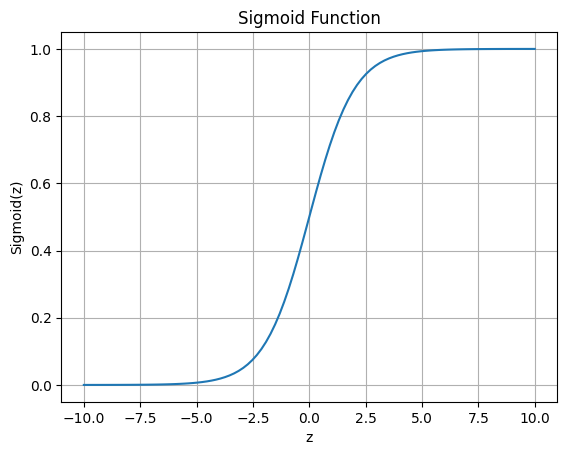

In [ ]:
plt.plot(z_vals, sigmoid_vals)
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.grid(True)
plt.show()

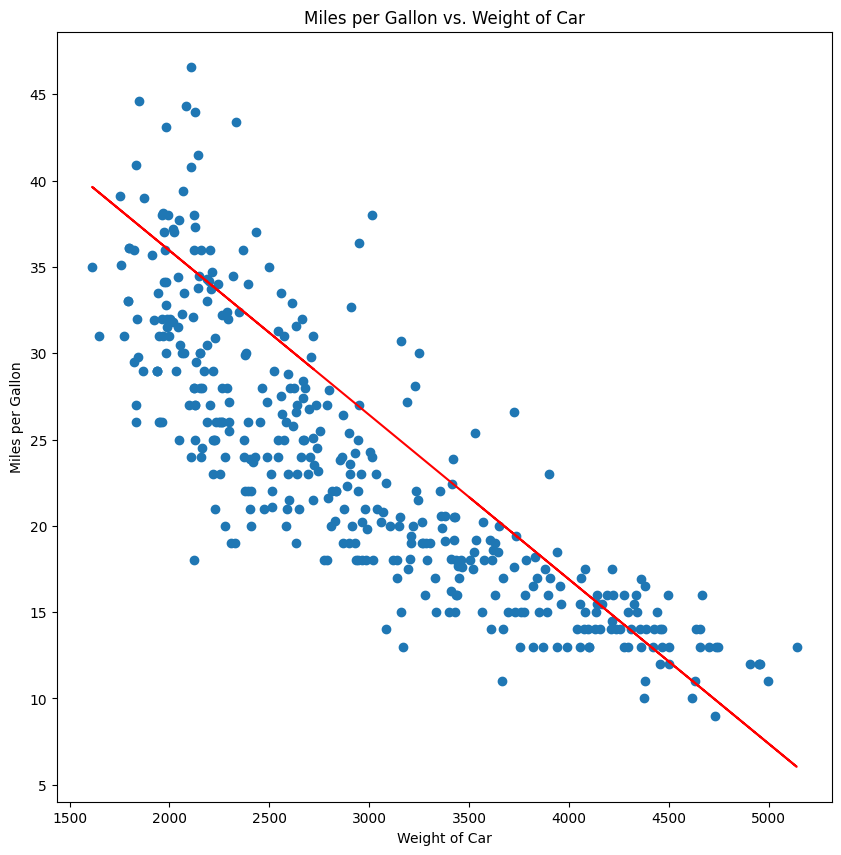

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

auto = pd.read_csv('/content/auto mpg_csv.zip')

auto.head()

X=auto[['weight']]
y=auto['mpg']

MPG_Predictor = LinearRegression()
MPG_Predictor.fit(X,y)

plt.figure(figsize=(10,10))
plt.scatter(auto['weight'],auto['mpg'])
plt.plot(auto['weight'], (auto['weight'] / -105) + 55, c='red')
plt.title('Miles per Gallon vs. Weight of Car')
plt.xlabel('Weight of Car')
plt.ylabel('Miles per Gallon')
plt.show()


Simple Imputer

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the Auto MPG dataset
auto = pd.read_csv('/content/auto mpg_csv.zip')

# Replace '?' with NaN
auto.replace('?', np.nan, inplace=True)

# Convert columns with numeric data (like 'horsepower') to the correct datatype
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')

# Check for missing values
print("Missing values before imputation:")
print(auto.isnull().sum())

# Create an imputer object to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Apply imputer to numeric columns (e.g., 'mpg', 'horsepower')
auto[['mpg', 'horsepower']] = imputer.fit_transform(auto[['mpg', 'horsepower']])

# Check if missing values are filled
print("\nMissing values after imputation:")
print(auto.isnull().sum())

# Display the first few rows of the dataset to verify
print("\nData after imputation:")
print(auto.head())


Missing values before imputation:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Missing values after imputation:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Data after imputation:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buic

1. Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Features and target
X = auto[['displacement', 'horsepower', 'weight']]
y = auto['mpg']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 14.8489839939408


2. **Random Forest**



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create and train the Random Forest model
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Make predictions
y_pred = forest.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 11.952476478124998


Visualization (Tree Structure)


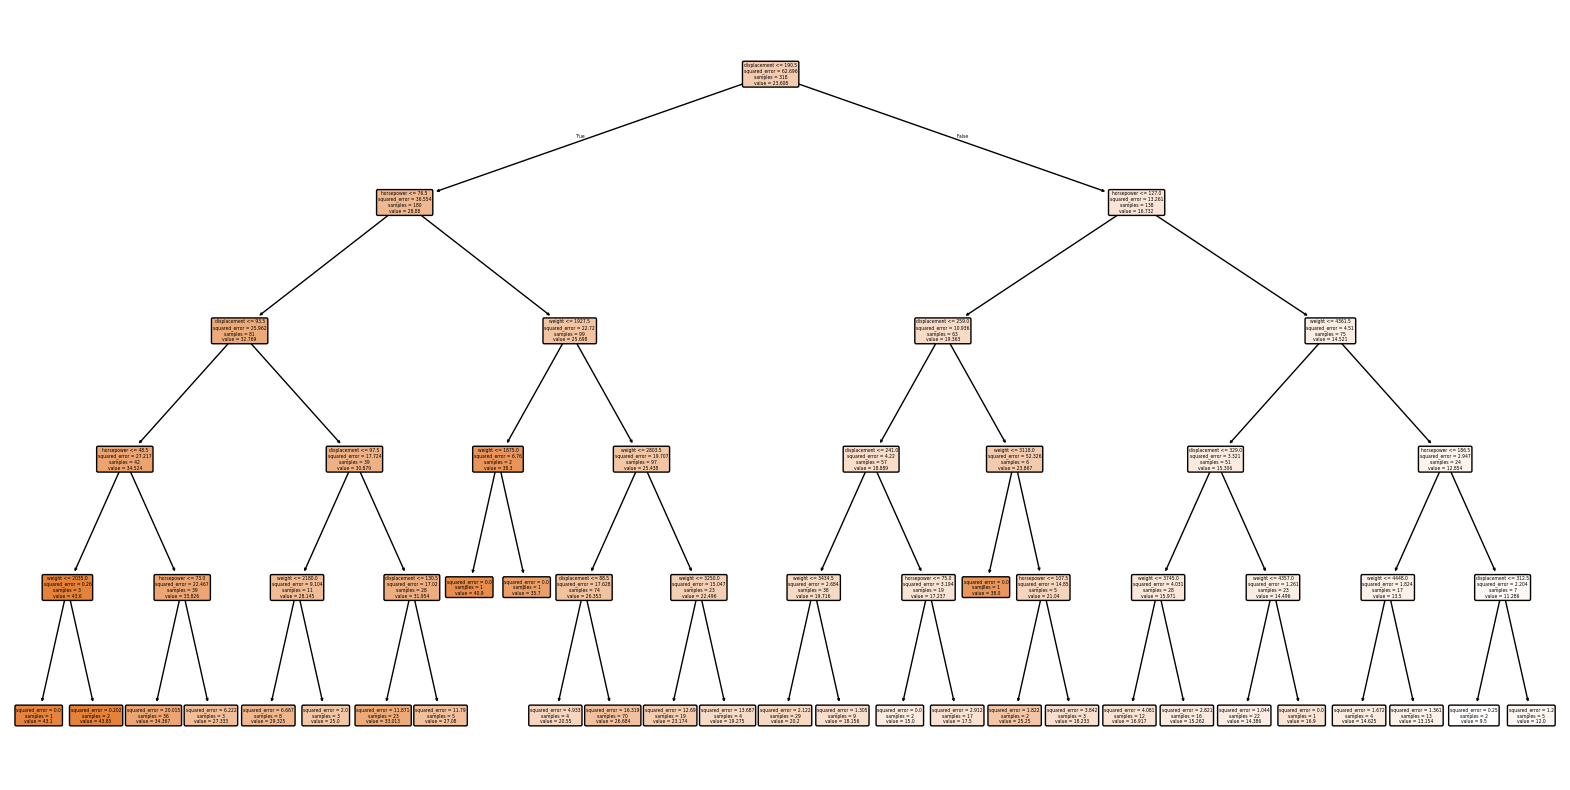

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=['displacement', 'horsepower', 'weight'], rounded=True)
plt.show()


In [ ]:
# Feature Importance
importances = forest.feature_importances_
for feature, importance in zip(['displacement', 'horsepower', 'weight'], importances):
    print(f"{feature}: {importance}")


displacement: 0.5812942262336924
horsepower: 0.1931877905020283
weight: 0.2255179832642793
